In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

plt.rcParams["axes.linewidth"]  = 2.0
plt.rcParams["xtick.major.size"]  = 10
plt.rcParams["xtick.minor.size"]  = 5
plt.rcParams["ytick.major.size"]  = 10
plt.rcParams["ytick.minor.size"]  = 5
plt.rcParams["xtick.direction"]  = "in"
plt.rcParams["ytick.direction"]  = "in"
plt.rcParams["legend.frameon"] = False
plt.rcParams['figure.figsize'] = [7, 7]
plt.rcParams['font.family']="serif"
plt.rc("text", usetex=True)
plt.rc("font", size=22)

# 1) Import the Excel file
file_path = "Hall Effect.xlsx"
df = pd.read_excel(file_path)


# H= 9120 G

In [30]:
I = df.iloc[1:, 1]  # A
V= df.iloc[1:, 2]  # mV

V=V/10**3

## Calculating $R_H$


[statsmodels results]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.860e+04
Date:                Sat, 15 Nov 2025   Prob (F-statistic):           3.85e-25
Time:                        06:02:26   Log-Likelihood:                 190.67
No. Observations:                  15   AIC:                            -377.3
Df Residuals:                      13   BIC:                            -375.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.937e-05   4.26e

/home/anargha/anaconda3/envs/base2/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


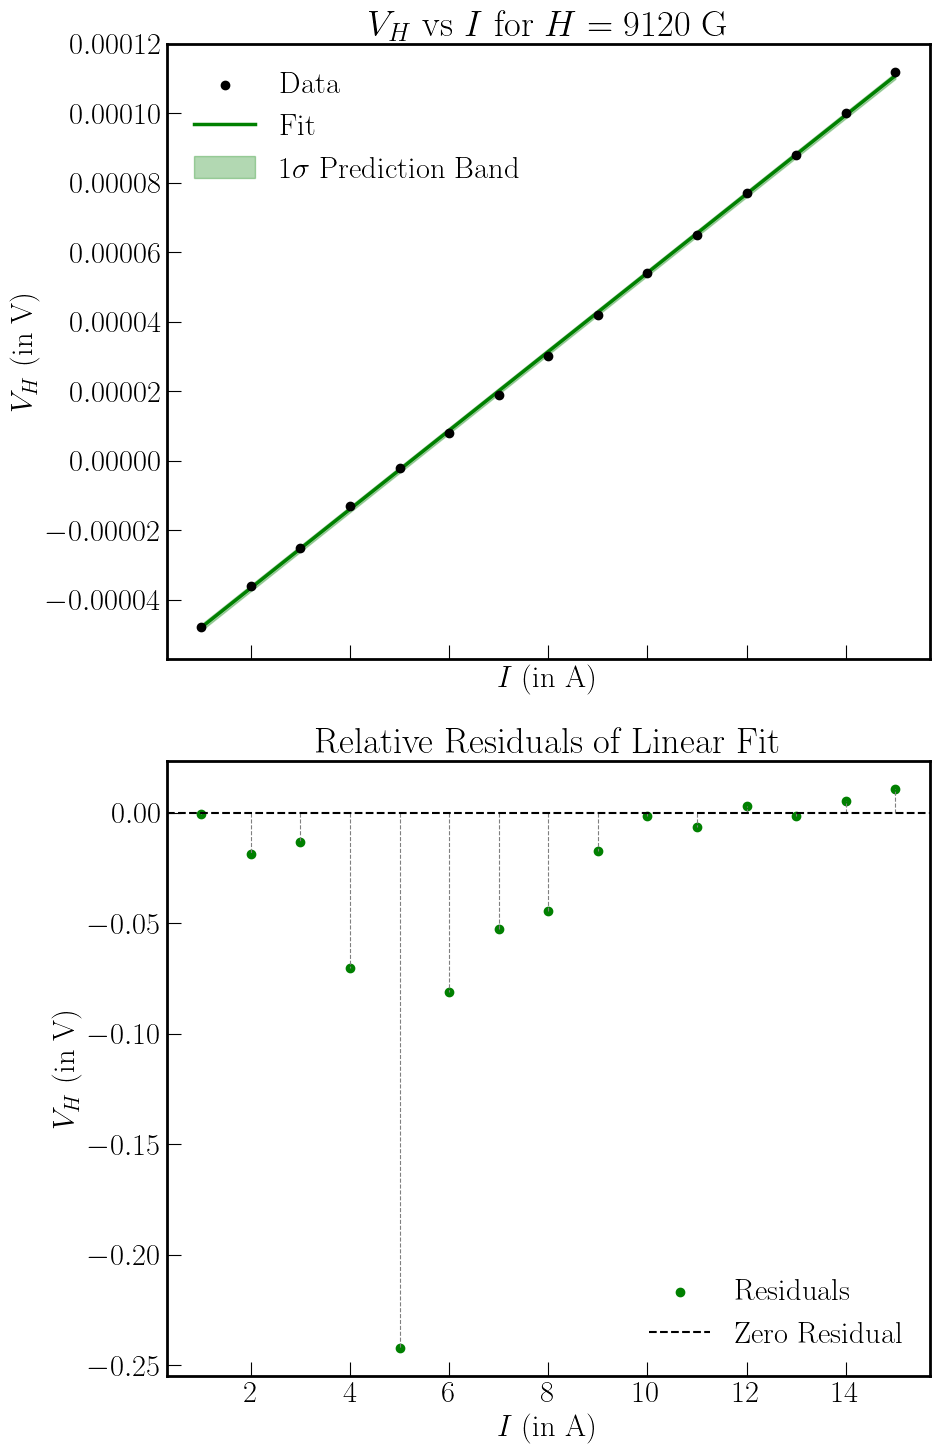

In [31]:
x=I
y=V
# --- statsmodels fit ---
X_sm = sm.add_constant(x.values)  # add intercept
model = sm.OLS(y.values, X_sm)
results = model.fit()

print("\n[statsmodels results]")
print(results.summary())
print(f"R^2 (statsmodels): {results.rsquared}")

# Extract parameters and covariance matrix
params = results.params
cov = results.cov_params()
errors = np.sqrt(np.diag(cov))

print("\nFitted parameters:")
print(params)
print("\nCovariance matrix:")
print(cov)
print("\nParameter uncertainties (1-sigma):")
print(errors)

# --- Build prediction grid ---
x_pred = np.linspace(x.min(), x.max(), 200)
X_pred = sm.add_constant(x_pred)   # must match fit design matrix

# --- Get predictions and intervals ---
pred_summary = results.get_prediction(X_pred).summary_frame(alpha=0.317)  # 1-sigma

y_pred = pred_summary['mean']
pred_ci_lower = pred_summary['mean_ci_lower']    # Confidence interval
pred_ci_upper = pred_summary['mean_ci_upper']
pred_pi_lower = pred_summary['obs_ci_lower']     # Prediction interval
pred_pi_upper = pred_summary['obs_ci_upper']

# --- Plot with error bands ---
fig, axs = plt.subplots(2, 1, figsize=(10,15), sharex=True)
axs[0].scatter(x, y, label="Data", color="black", zorder=10)
axs[0].plot(x_pred, y_pred, label="Fit", color="green", linewidth=2.5)

# Prediction interval (wide)
axs[0].fill_between(x_pred, pred_pi_lower, pred_pi_upper,
                 color="green", alpha=0.3, label=r"$1\sigma$ Prediction Band")

# Optional: Confidence interval (narrower)
# plt.fill_between(x_pred, pred_ci_lower, pred_ci_upper,
#                  color="blue", alpha=0.3, label=r"$1\sigma$ Confidence Band")

axs[0].set_xlabel(r"$I$ (in A)")
axs[0].set_ylabel(r"$V_H$ (in V)")
axs[0].set_title(r"$V_H$ vs $I$ for $H=9120$ G ")
axs[0].legend()
# --- Compute fitted values ---
y_fit = results.predict(X_sm)

# --- Compute relative residuals ---
residuals = (y - y_fit) / y_fit

# --- Residual plot ---
axs[1].scatter(x, residuals, color="green", label="Residuals")

# Drop perpendicular (vertical) lines from residuals to 0 line
for xi, ri in zip(x, residuals):
    axs[1].plot([xi, xi], [0, ri], color="gray", linestyle="--", linewidth=0.8)

axs[1].axhline(0, color="black", linestyle="--", label="Zero Residual")
axs[1].set_xlabel(r"$I$ (in A)")
axs[1].set_ylabel(r"$V_H$ (in V)")
axs[1].set_title("Relative Residuals of Linear Fit")
axs[1].legend()

plt.tight_layout()
plt.savefig("H1.png", dpi=300)

plt.show()


In [35]:
m=params[1]

In [36]:
rh=m*(1.38*10**(-3))/0.9120
print(rh)
print(1/((rh)*1.602*(10**(-19))))
print(rh/(1.29*10**(-6)))

1.7168937969924818e-08
3.6357503675345516e+26
0.013309254240251797


# H=3580 G

In [52]:
I = df.iloc[1:, 6]  # A
V= df.iloc[1:, 7]  # mV

V=V/10**3


[statsmodels results]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.110e+04
Date:                Sat, 15 Nov 2025   Prob (F-statistic):           3.86e-24
Time:                        06:08:46   Log-Likelihood:                 187.77
No. Observations:                  15   AIC:                            -371.5
Df Residuals:                      13   BIC:                            -370.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.923e-05   5.17e

/home/anargha/anaconda3/envs/base2/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


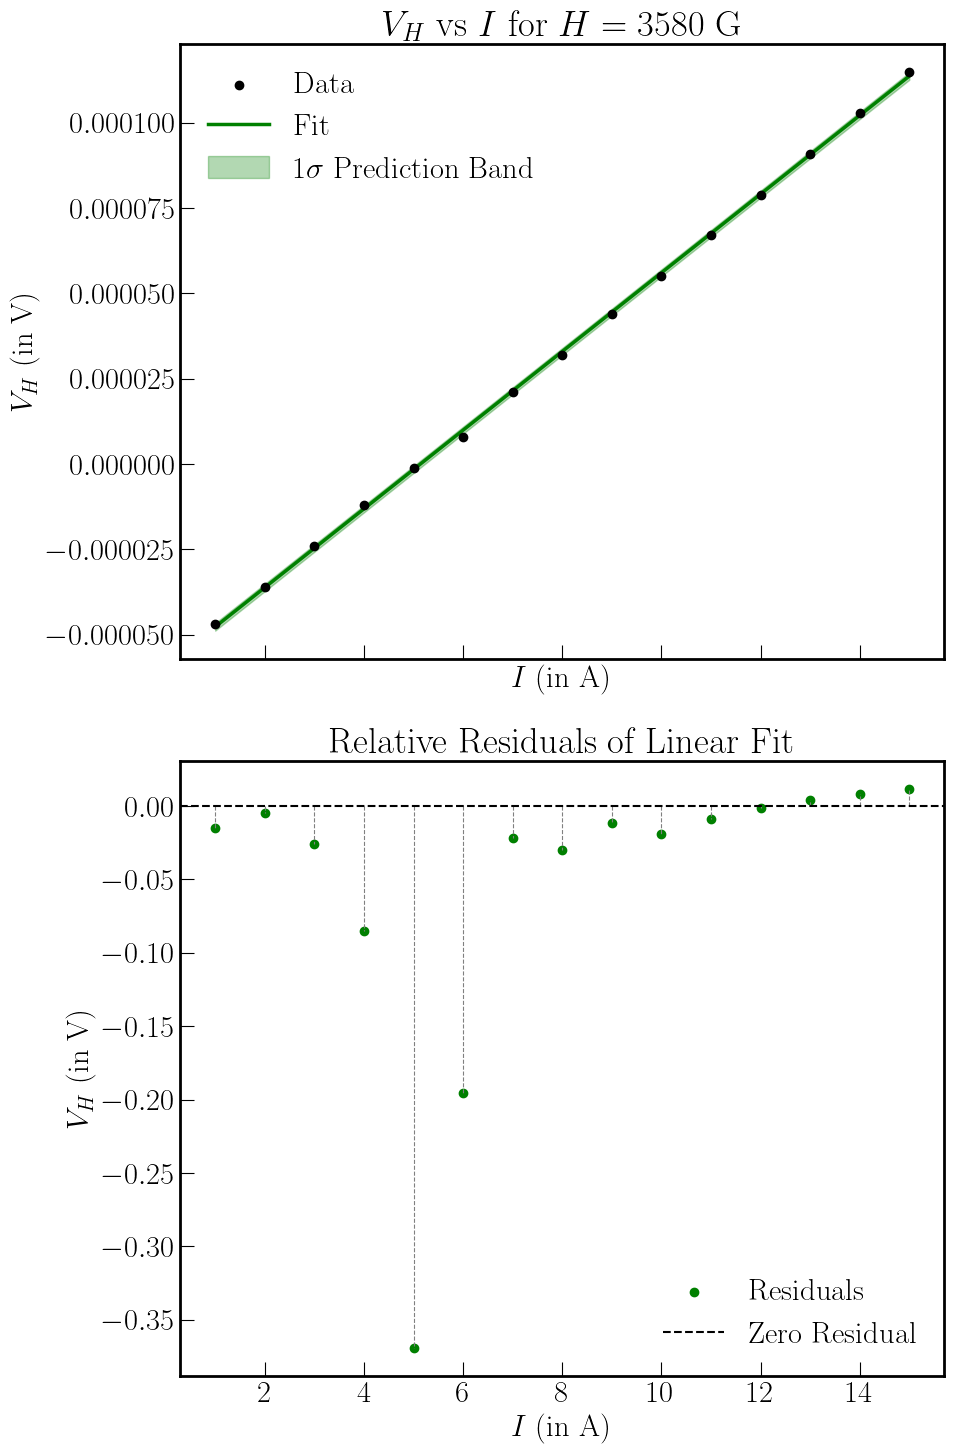

In [53]:
x=I
y=V
# --- statsmodels fit ---
X_sm = sm.add_constant(x.values)  # add intercept
model = sm.OLS(y.values, X_sm)
results = model.fit()

print("\n[statsmodels results]")
print(results.summary())
print(f"R^2 (statsmodels): {results.rsquared}")

# Extract parameters and covariance matrix
params = results.params
cov = results.cov_params()
errors = np.sqrt(np.diag(cov))

print("\nFitted parameters:")
print(params)
print("\nCovariance matrix:")
print(cov)
print("\nParameter uncertainties (1-sigma):")
print(errors)

# --- Build prediction grid ---
x_pred = np.linspace(x.min(), x.max(), 200)
X_pred = sm.add_constant(x_pred)   # must match fit design matrix

# --- Get predictions and intervals ---
pred_summary = results.get_prediction(X_pred).summary_frame(alpha=0.317)  # 1-sigma

y_pred = pred_summary['mean']
pred_ci_lower = pred_summary['mean_ci_lower']    # Confidence interval
pred_ci_upper = pred_summary['mean_ci_upper']
pred_pi_lower = pred_summary['obs_ci_lower']     # Prediction interval
pred_pi_upper = pred_summary['obs_ci_upper']

# --- Plot with error bands ---
fig, axs = plt.subplots(2, 1, figsize=(10,15), sharex=True)
axs[0].scatter(x, y, label="Data", color="black", zorder=10)
axs[0].plot(x_pred, y_pred, label="Fit", color="green", linewidth=2.5)

# Prediction interval (wide)
axs[0].fill_between(x_pred, pred_pi_lower, pred_pi_upper,
                 color="green", alpha=0.3, label=r"$1\sigma$ Prediction Band")

# Optional: Confidence interval (narrower)
# plt.fill_between(x_pred, pred_ci_lower, pred_ci_upper,
#                  color="blue", alpha=0.3, label=r"$1\sigma$ Confidence Band")

axs[0].set_xlabel(r"$I$ (in A)")
axs[0].set_ylabel(r"$V_H$ (in V)")
axs[0].set_title(r"$V_H$ vs $I$ for $H=3580$ G ")
axs[0].legend()
# --- Compute fitted values ---
y_fit = results.predict(X_sm)

# --- Compute relative residuals ---
residuals = (y - y_fit) / y_fit

# --- Residual plot ---
axs[1].scatter(x, residuals, color="green", label="Residuals")

# Drop perpendicular (vertical) lines from residuals to 0 line
for xi, ri in zip(x, residuals):
    axs[1].plot([xi, xi], [0, ri], color="gray", linestyle="--", linewidth=0.8)

axs[1].axhline(0, color="black", linestyle="--", label="Zero Residual")
axs[1].set_xlabel(r"$I$ (in A)")
axs[1].set_ylabel(r"$V_H$ (in V)")
axs[1].set_title("Relative Residuals of Linear Fit")
axs[1].legend()

plt.tight_layout()
plt.savefig("H2.png", dpi=300)

plt.show()


In [54]:
m=params[1]

In [55]:
rh=m*(1.38*10**(-3))/0.3580
print(rh)
print(1/((rh)*1.602*(10**(-19))))
print(rh/(1.29*10**(-6)))

4.443974461292898e-08
1.4046429176861534e+26
0.03444941442862712


# H=10180G 

In [56]:
I = df.iloc[1:, 11]  # A
V= df.iloc[1:, 12]  # mV

V=V/10**3


[statsmodels results]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.825e+04
Date:                Sat, 15 Nov 2025   Prob (F-statistic):           7.54e-22
Time:                        06:08:54   Log-Likelihood:                 182.55
No. Observations:                  15   AIC:                            -361.1
Df Residuals:                      13   BIC:                            -359.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.556e-05   7.32e

/home/anargha/anaconda3/envs/base2/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


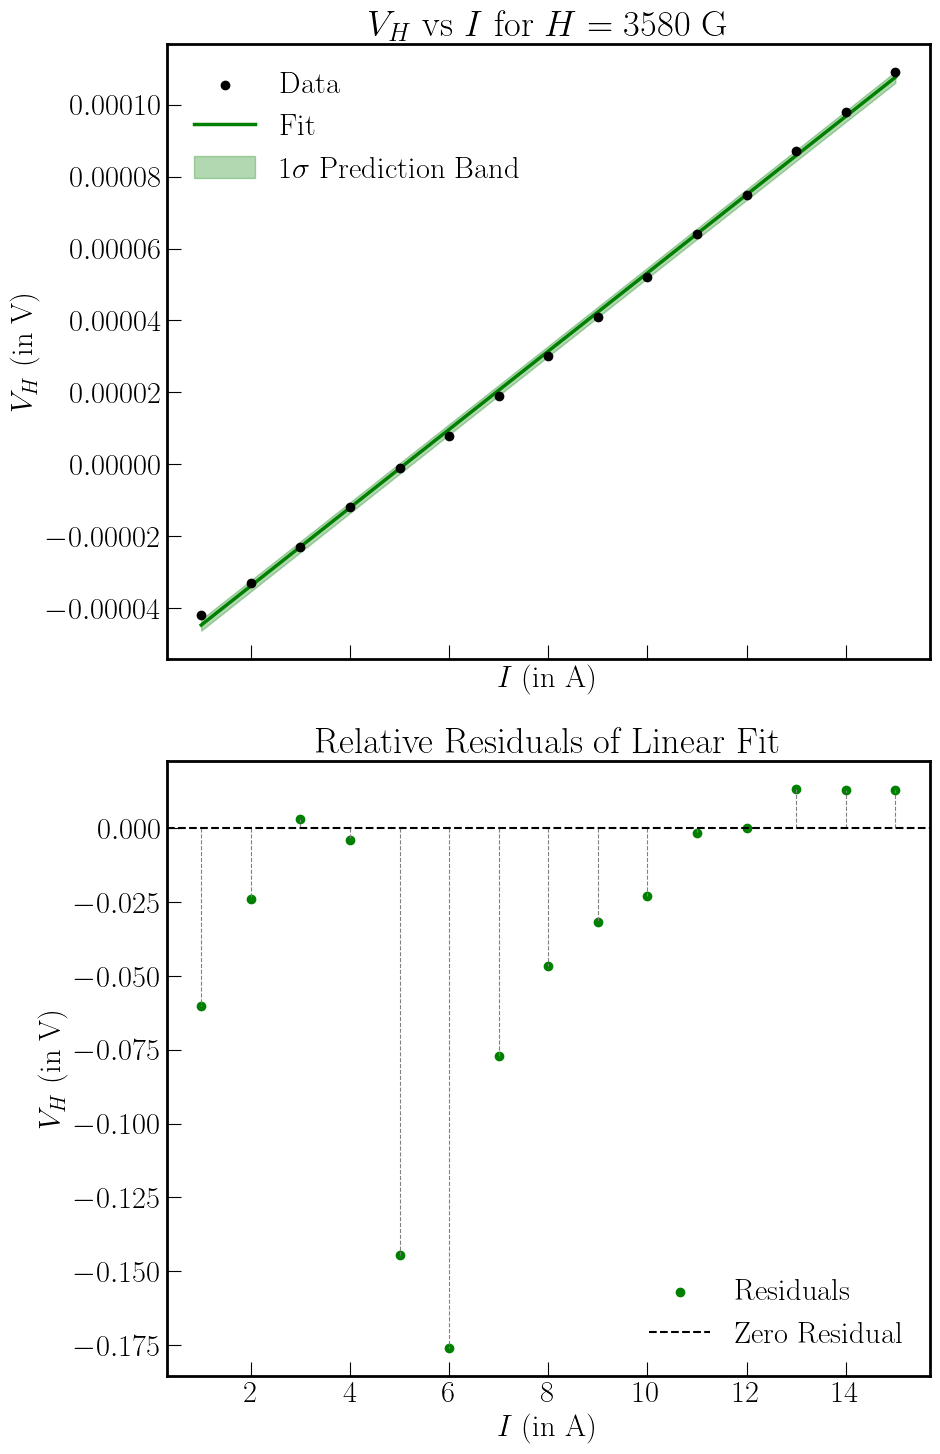

In [57]:
x=I
y=V
# --- statsmodels fit ---
X_sm = sm.add_constant(x.values)  # add intercept
model = sm.OLS(y.values, X_sm)
results = model.fit()

print("\n[statsmodels results]")
print(results.summary())
print(f"R^2 (statsmodels): {results.rsquared}")

# Extract parameters and covariance matrix
params = results.params
cov = results.cov_params()
errors = np.sqrt(np.diag(cov))

print("\nFitted parameters:")
print(params)
print("\nCovariance matrix:")
print(cov)
print("\nParameter uncertainties (1-sigma):")
print(errors)

# --- Build prediction grid ---
x_pred = np.linspace(x.min(), x.max(), 200)
X_pred = sm.add_constant(x_pred)   # must match fit design matrix

# --- Get predictions and intervals ---
pred_summary = results.get_prediction(X_pred).summary_frame(alpha=0.317)  # 1-sigma

y_pred = pred_summary['mean']
pred_ci_lower = pred_summary['mean_ci_lower']    # Confidence interval
pred_ci_upper = pred_summary['mean_ci_upper']
pred_pi_lower = pred_summary['obs_ci_lower']     # Prediction interval
pred_pi_upper = pred_summary['obs_ci_upper']

# --- Plot with error bands ---
fig, axs = plt.subplots(2, 1, figsize=(10,15), sharex=True)
axs[0].scatter(x, y, label="Data", color="black", zorder=10)
axs[0].plot(x_pred, y_pred, label="Fit", color="green", linewidth=2.5)

# Prediction interval (wide)
axs[0].fill_between(x_pred, pred_pi_lower, pred_pi_upper,
                 color="green", alpha=0.3, label=r"$1\sigma$ Prediction Band")

# Optional: Confidence interval (narrower)
# plt.fill_between(x_pred, pred_ci_lower, pred_ci_upper,
#                  color="blue", alpha=0.3, label=r"$1\sigma$ Confidence Band")

axs[0].set_xlabel(r"$I$ (in A)")
axs[0].set_ylabel(r"$V_H$ (in V)")
axs[0].set_title(r"$V_H$ vs $I$ for $H=3580$ G ")
axs[0].legend()
# --- Compute fitted values ---
y_fit = results.predict(X_sm)

# --- Compute relative residuals ---
residuals = (y - y_fit) / y_fit

# --- Residual plot ---
axs[1].scatter(x, residuals, color="green", label="Residuals")

# Drop perpendicular (vertical) lines from residuals to 0 line
for xi, ri in zip(x, residuals):
    axs[1].plot([xi, xi], [0, ri], color="gray", linestyle="--", linewidth=0.8)

axs[1].axhline(0, color="black", linestyle="--", label="Zero Residual")
axs[1].set_xlabel(r"$I$ (in A)")
axs[1].set_ylabel(r"$V_H$ (in V)")
axs[1].set_title("Relative Residuals of Linear Fit")
axs[1].legend()

plt.tight_layout()
plt.savefig("H3.png", dpi=300)

plt.show()


In [58]:
m=params[1]

In [59]:
rh=m*(1.38*10**(-3))/1.0180
print(rh)
print(1/((rh)*1.602*(10**(-19))))
print(rh/(1.29*10**(-6)))

1.474698287959585e-08
4.232863972514681e+26
0.011431769674105311
